# FUENTES

## Acerca del Conjunto de Datos

Este es un conjunto de datos de pistas de Spotify que abarcan 125 géneros diferentes. Cada pista tiene algunas características de audio asociadas. Los datos están en formato CSV, que es tabular y puede cargarse rápidamente.

## Descripción de las Columnas
- **track_id**: El ID de Spotify para la pista.
- **artists**: Nombres de los artistas que interpretaron la pista. Si hay más de un artista, están separados por un `;`.
- **album_name**: Nombre del álbum en el que aparece la pista.
- **track_name**: Nombre de la pista.
- **popularity**: La popularidad de una pista es un valor entre 0 y 100, donde 100 es la más popular. Se calcula mediante un algoritmo y se basa, en su mayor parte, en el número total de reproducciones y en cuán recientes son esas reproducciones. Generalmente, las canciones que se están reproduciendo mucho en el presente tendrán una popularidad más alta que las que fueron reproducidas mucho en el pasado. Las pistas duplicadas (por ejemplo, la misma pista de un sencillo y de un álbum) se califican independientemente. La popularidad del artista y del álbum se deriva matemáticamente de la popularidad de la pista.
- **duration_ms**: Duración de la pista en milisegundos.
- **explicit**: Indica si la pista tiene letras explícitas (`true` = sí; `false` = no o desconocido).
- **danceability**: Describe la idoneidad de una pista para bailar, basado en una combinación de elementos musicales como el tempo, la estabilidad del ritmo, la fuerza del beat y la regularidad general. Un valor de 0.0 es menos bailable y 1.0 es más bailable.
- **energy**: Una medida de 0.0 a 1.0 que representa la intensidad y actividad percibida. Las pistas enérgicas suelen ser rápidas, fuertes y ruidosas.
- **key**: La clave musical en la que está la pista. Los números enteros se asignan a tonos usando la notación estándar de clase de tono (Pitch Class).
- **loudness**: La intensidad general del sonido de una pista en decibeles (dB).
- **mode**: Indica la modalidad de una pista (mayor o menor). `1` representa mayor y `0` representa menor.
- **speechiness**: Detecta la presencia de palabras habladas en una pista.
- **acousticness**: Una medida de confianza de 0.0 a 1.0 que indica si la pista es acústica.
- **instrumentalness**: Predice si una pista no contiene voces.
- **liveness**: Detecta la presencia de una audiencia en la grabación.
- **valence**: Una medida de 0.0 a 1.0 que describe la positividad musical de una pista.
- **tempo**: Tempo estimado de una pista en pulsos por minuto (BPM).
- **time_signature**: Indica el número de pulsos en cada compás.
- **track_genre**: Género al que pertenece la pista.


## LIBRERIAS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## CARGAR DATOS

In [2]:
df = pd.read_csv("../data/raw/dataset.csv", index_col=0)

In [3]:
df.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


## INFORMACION DEL DATASET

In [4]:
print("Total de filas:", df.shape[0])
print("Total de columnas:", df.shape[1])
print("\nTipos de datos:")
print(df.dtypes)
print("\nValores nulos por columna:")
print(df.isnull().sum())

Total de filas: 114000
Total de columnas: 20

Tipos de datos:
track_id             object
artists              object
album_name           object
track_name           object
popularity            int64
duration_ms           int64
explicit               bool
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
track_genre          object
dtype: object

Valores nulos por columna:
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
livene

## VISUALIZACIONES

Text(0.5, 1.0, 'Distribución de Popularidad')

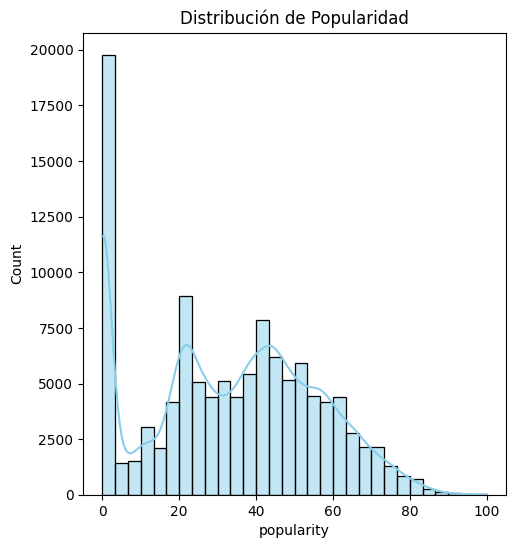

In [5]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['popularity'], bins=30, kde=True, color='skyblue')
plt.title('Distribución de Popularidad')

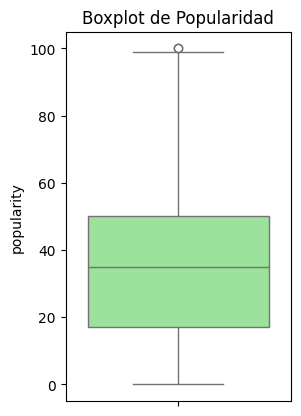

In [6]:
plt.subplot(1, 2, 2)
sns.boxplot(y=df['popularity'], color='lightgreen')
plt.title('Boxplot de Popularidad')
plt.show()

## CORRELACIONES

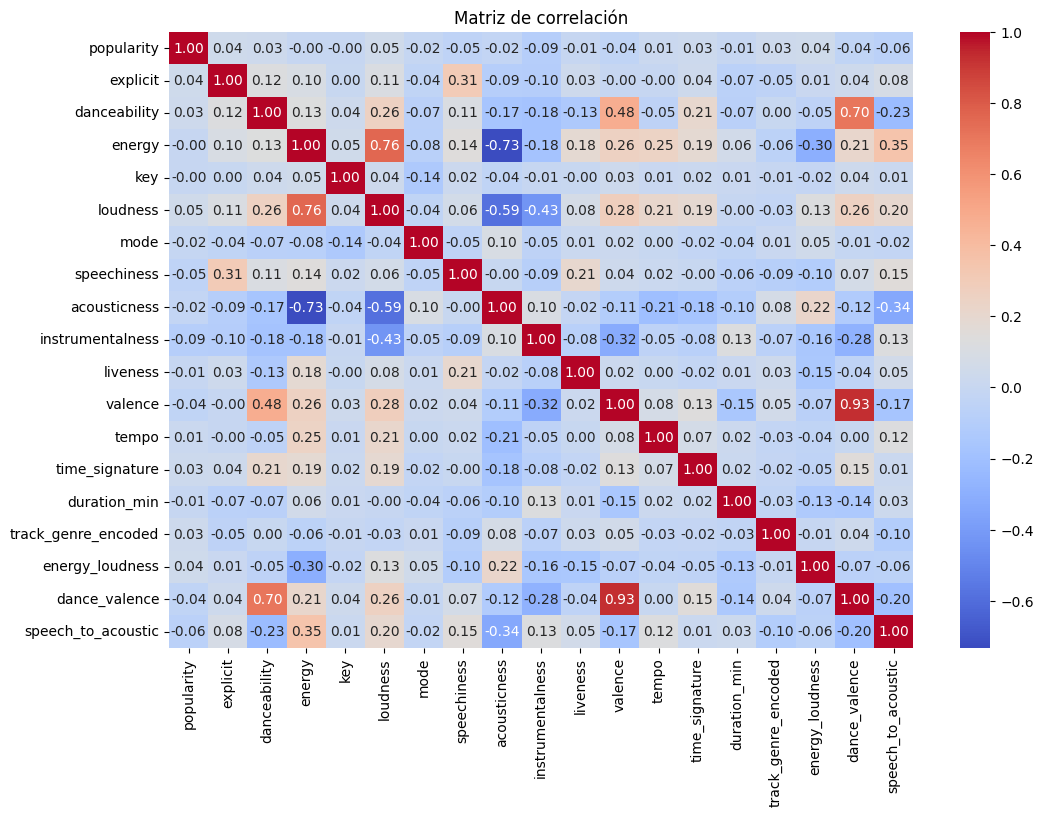

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("../data/processed/dataset_clean.csv")
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matriz de correlación")
plt.show()
